    1.randomforestregressor

In [1]:
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

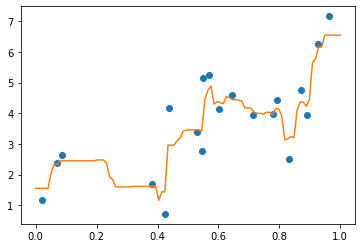

In [2]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

In [14]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.arange(1,1500,1)]
min_samples_split = [int(x) for x in np.arange(1,8,1)]
min_samples_leaf = [int(x) for x in np.arange(1,8,1)]
max_depth = [int(x) for x in np.arange(1,8,1)]
max_features = ['auto','sqrt']
bootstrap=[False,True]
random_params_={'n_estimators':n_estimators
                ,'min_samples_split':min_samples_split
                ,'min_samples_leaf':min_samples_leaf
                ,'max_depth':max_depth
                ,'max_features':max_features
                ,'bootstrap':bootstrap
               }
#随机搜索
random_model = RandomizedSearchCV(model,param_distributions=random_params_,n_iter=80,scoring='neg_mean_squared_error',cv=6,random_state=30,n_jobs=-1)
random_model.fit(X,y)
random_model.best_params_

C:\Users\yangchen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yangchen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yangchen\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\yangchen\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\yangchen\anaconda3\lib

{'n_estimators': 986,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

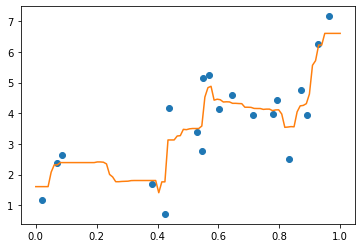

In [15]:
model = RandomForestRegressor(
                n_estimators = 986
                ,min_samples_split = 2
                ,min_samples_leaf = 1
                ,max_features = 'sqrt'
                ,max_depth = 4
                ,bootstrap = True
                                )
model.fit(X, y)
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

In [ ]:
#网格搜索
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.arange(1,1500,1)]
min_samples_split = [int(x) for x in np.arange(1,8,1)]
min_samples_leaf = [int(x) for x in np.arange(1,8,1)]
max_depth = [int(x) for x in np.arange(1,8,1)]
max_features = ['auto','sqrt']
bootstrap=[False,True]
param_grid={'n_estimators':n_estimators
                ,'min_samples_split':min_samples_split
                ,'min_samples_leaf':min_samples_leaf
                ,'max_depth':max_depth
                ,'max_features':max_features
                ,'bootstrap':bootstrap
               }

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
 
grid_search.fit(X, y)
grid_search.best_params_

    2.调研pca

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [10]:
iris = load_iris()
X = iris.data
y = iris.target
pca = PCA(n_components=2)
pca =pca.fit(X)
X_dr =PCA(2).fit_transform(X)

In [6]:
X_dr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

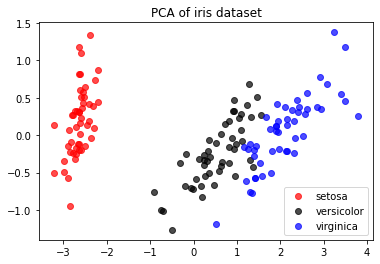

In [7]:
#可视化
colors=["red","black","blue"]
iris.target_names

plt.figure()
for i in [0,1,2]:
    plt.scatter(X_dr[y==i,0],X_dr[y==i,1],alpha=.7,c=colors[i],label=iris.target_names[i])
plt.legend()
plt.title('PCA of iris dataset')
plt.show()

In [11]:
pca.explained_variance_  #查看降维后每个新特征向量上所带的信息大小（可解释性方差的大小）
#降维后，即第一个特征所携带的信息量更大，第二个特征所携带的信息量较小

array([4.22824171, 0.24267075])

In [12]:
pca.explained_variance_ratio_
#查看降维后每个新特征向量占原始数据信息量的百分比，可解释方差的贡献率

array([0.92461872, 0.05306648])

In [13]:
pca.explained_variance_ratio_.sum()

0.9776852063187949

In [ ]:
#保留了原始数据百分之97的数据量，降成了两维

In [15]:
pca_line = PCA().fit(X)
pca_line.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [16]:
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance")
plt.show()

3.用随机森林对digit数据进行分类，并探究每个参数对模型的影响

In [87]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)

(1797, 64)


In [34]:
scorel=[]
for i in range(0,20,1):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=30)
    score = cross_val_score(rfc,X,y,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))))
plt.figure(figsize=[20,5])
plt.plot(range(1,21,1),scorel)
plt.show()

0.9376753569211669 18


In [35]:
model = RandomForestClassifier(n_estimators=19,
                                n_jobs=-1,
                                random_state=30)
score = cross_val_score(model,X,y,cv=10).mean()
score

0.9376753569211669

In [36]:
param_grid = {'max_depth':np.arange(1,20,1)}
d = rfc = RandomForestClassifier(n_estimators=19,
                                n_jobs=-1,
                                random_state=30)
GS = GridSearchCV(d,param_grid,cv=10)
GS.fit(X,y)
GS.best_params_

{'max_depth': 12}

In [37]:
GS.best_score_
#准确率上升

0.9404500310366231

In [38]:
param_grid = {'criterion':['gini','entropy']}
e = RandomForestClassifier(n_estimators=19,
                                n_jobs=-1,
                                random_state=30,
                                max_depth =12,
                                )
GS = GridSearchCV(e,param_grid,cv=10)
GS.fit(X,y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=12, n_estimators=19,
                                              n_jobs=-1, random_state=30),
             param_grid={'criterion': ['gini', 'entropy']})

In [39]:
GS.best_params_

{'criterion': 'gini'}

In [40]:
GS.best_score_

0.9404500310366231

In [41]:
param_grid = {'max_features':np.arange(1,10,1)}
c = rfc = RandomForestClassifier(n_estimators=19,
                                n_jobs=-1,
                                random_state=30,
                                max_depth =12                           
                                )
GS = GridSearchCV(c,param_grid,cv=10)
GS.fit(X,y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=12, n_estimators=19,
                                              n_jobs=-1, random_state=30),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [42]:
GS.best_params_

{'max_features': 8}

In [43]:
GS.best_score_

0.9404500310366231

In [44]:
model_finish = RandomForestClassifier(n_estimators=19,
                                n_jobs=-1,
                                random_state=30,
                                max_depth =12,
                                max_features=8,
                                criterion='gini'
                                     )
score = cross_val_score(model,iris.data,iris.target,cv=10).mean()
score

0.96

In [ ]:
#用svc对模型进行分类和使用sklearn.metrics.f1_score进行评估
#对环形数据，月亮型数据，混淆型数据中，有噪音的数据，kernel中rbf表现最好
#linear线性核函数和poly多项式核函数在非线性数据上表现一般浮动较大，如果数据相对线性可分，则表现不错，
#如果像环形数据那样彻底不可分则表现糟糕。在线型数据集上，线性核函数和多项式很函数即便有扰动项也可以表现不错
#可见多项式核函数虽然可以处理非线性的情况，但更偏向于线性的功能
#kernel:sigmoid未知

In [55]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from time import time
import datetime
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [46]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [65]:
np.unique(y) #有10个标签

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
plt.scatter(X[:,9],X[:,1],c=y)
plt.show()

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.3, random_state=0)
Kernel = ['linear','poly','sigmoid','rbf']

In [66]:
for kernel in Kernel:
    time0=time()
    clf = SVC(kernel=kernel
             ,gamma='auto'
             #,degree=1
             , cache_size=5000 #MB
             ).fit(Xtrain,ytrain)
    print('The accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,ytest))) #字符小数
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.974074
00:00:320956
The accuracy under kernel poly is 0.979630
00:00:239592
The accuracy under kernel sigmoid is 0.088889
00:00:259025
The accuracy under kernel rbf is 0.472222
00:00:986612


In [56]:
now = time() #时间戳，一个时间点

In [59]:
datetime.datetime.fromtimestamp(now).strftime("%Y-%m-%d,%M:%S:%f")

'2022-12-04,04:23:063095'

In [67]:
import pandas as pd
data=pd.DataFrame(X)

#数据的量纲不统一
#数据分布偏态


In [69]:
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

count       mean       std  min   1%   5%  10%   25%   50%   75%   90%  \
0   1797.0   0.000000  0.000000  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   
1   1797.0   0.303840  0.907192  0.0  0.0  0.0  0.0   0.0   0.0   0.0   1.0   
2   1797.0   5.204786  4.754826  0.0  0.0  0.0  0.0   1.0   4.0   9.0  13.0   
3   1797.0  11.835838  4.248842  0.0  0.0  2.0  5.0  10.0  13.0  15.0  16.0   
4   1797.0  11.848080  4.287388  0.0  0.0  2.0  5.0  10.0  13.0  15.0  16.0   
..     ...        ...       ...  ...  ...  ...  ...   ...   ...   ...   ...   
59  1797.0  12.089037  4.374694  0.0  0.0  2.0  5.0  11.0  13.0  16.0  16.0   
60  1797.0  11.809126  4.933947  0.0  0.0  0.0  3.0  10.0  14.0  16.0  16.0   
61  1797.0   6.764051  5.900623  0.0  0.0  0.0  0.0   0.0   6.0  12.0  16.0   
62  1797.0   2.067891  4.090548  0.0  0.0  0.0  0.0   0.0   0.0   2.0   8.0   
63  1797.0   0.364496  1.860122  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   

     99%   max  
0    0.0   0.0  
1    4.0   8.0  
2   16.0  16.0  
3   16.0  16.0  
4   16.0  16.0  
..   ...   ...  
59  16.0  16.0  
60  16.0  16.0  
61  16.0  16.0  
62  16.0  16.0  
63  12.0  16.0  

[64 rows x 13 columns]

In [73]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
data1=pd.DataFrame(X)

In [74]:
data1.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

count          mean       std       min        1%        5%       10%  \
0   1797.0  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
1   1797.0  1.004514e-15  1.000278 -0.335016 -0.335016 -0.335016 -0.335016   
2   1797.0  6.284468e-16  1.000278 -1.094937 -1.094937 -1.094937 -1.094937   
3   1797.0  1.051901e-15  1.000278 -2.786437 -2.786437 -2.315590 -1.609319   
4   1797.0 -1.152235e-16  1.000278 -2.764242 -2.764242 -2.297628 -1.597706   
..     ...           ...       ...       ...       ...       ...       ...   
59  1797.0  2.837610e-16  1.000278 -2.764171 -2.764171 -2.306869 -1.620916   
60  1797.0  5.615060e-16  1.000278 -2.394110 -2.394110 -2.394110 -1.785908   
61  1797.0  1.886823e-16  1.000278 -1.146647 -1.146647 -1.146647 -1.146647   
62  1797.0  1.204935e-15  1.000278 -0.505670 -0.505670 -0.505670 -0.505670   
63  1797.0  1.094067e-15  1.000278 -0.196008 -0.196008 -0.196008 -0.196008   

         25%       50%       75%       90%       99%       max  
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  -0.335016 -0.335016 -0.335016  0.767593  4.075420  8.485857  
2  -0.884566 -0.253452  0.798404  1.639888  2.271002  2.271002  
3  -0.432200  0.274072  0.744919  0.980343  0.980343  0.980343  
4  -0.431170  0.268751  0.735366  0.968673  0.968673  0.968673  
..       ...       ...       ...       ...       ...       ...  
59 -0.249010  0.208293  0.894246  0.894246  0.894246  0.894246  
60 -0.366771  0.444164  0.849632  0.849632  0.849632  0.849632  
61 -1.146647 -0.129523  0.887602  1.565686  1.565686  1.565686  
62 -0.505670 -0.505670 -0.016602  1.450603  3.406875  3.406875  
63 -0.196008 -0.196008 -0.196008 -0.196008  6.256979  8.407974  

[64 rows x 13 columns]

In [75]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.3, random_state=0)
Kernel = ['linear','poly','sigmoid','rbf']

In [76]:
for kernel in Kernel:
    time0=time()
    clf = SVC(kernel=kernel
             ,gamma='auto'
             #,degree=1
             , cache_size=5000 #MB
             ).fit(Xtrain,ytrain)
    print('The accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,ytest))) #字符小数
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.974074
00:00:349766
The accuracy under kernel poly is 0.950000
00:00:422340
The accuracy under kernel sigmoid is 0.944444
00:00:348277
The accuracy under kernel rbf is 0.985185
00:00:383977


0.9851851851851852 0.020235896477251554


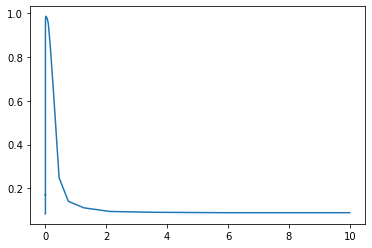

In [78]:
score=[]
gamma_range = np.logspace(-10,1,50)#返回在对数刻度上郡南韵间隔的数字
for i in gamma_range:
    clf=SVC(kernel='rbf',gamma=i,cache_size=5000).fit(Xtrain,ytrain)
    score.append(clf.score(Xtest,ytest))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

time0 =time()
gamma_range = np.logspace(-5,1,20)
coef0_range = np.linspace(0,5,10)

param_grid=dict(gamma=gamma_range,coef0=coef0_range)

cv =StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=400)
grid = GridSearchCV(SVC(kernel='poly',degree=1,cache_size=5000),param_grid=param_grid,cv=cv)

grid.fit(X,y)

print("The best parameters are %s with score of %0.5f" % (grid.best_params_,grid.best_score_)
     )
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

KeyboardInterrupt: 

In [85]:
#重要参数C 软间隔
#松弛系数的惩罚系数，如果C值设定比较大，那SVC可能会选择边际更小，能够更好的分类决策边界
#训练的时间也会更长


#调线性核函数
score=[]
C_range = np.linspace(0.01,30,50)#返回在对数刻度上郡南韵间隔的数字
for i in C_range:
    clf=SVC(kernel='linear',C=i,cache_size=5000).fit(Xtrain,ytrain)
    
    score.append(clf.score(Xtest,ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.975925925925926 0.01


0.9851851851851852 1.2340816326530613


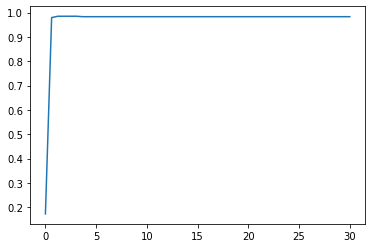

In [86]:
#换rbf
score=[]
C_range = np.linspace(0.01,30,50)#返回在对数刻度上郡南韵间隔的数字
for i in C_range:
    clf=SVC(kernel='rbf',C=i,cache_size=5000,gamma=0.020235896477251554).fit(Xtrain,ytrain)
    
    score.append(clf.score(Xtest,ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

5.使用sklearn.metrics.f1_score对模型进行打分，计算F1分数，称为平衡F分数或F测度，可理解为精度和查全率的平均加权，其中F1分数在1时达到最佳值，在0时达到最差值。且两个对F1分数的相对贡献相等

In [88]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [89]:
X = digits.data
y = digits.target
X = StandardScaler().fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.3, random_state=0)

In [95]:
svcf = SVC(kernel='rbf',C=1.2340816326530613,cache_size=5000,gamma=0.020235896477251554).fit(Xtrain,ytrain)
ypred=svcf.predict(Xtest)
import sklearn
print(metrics.accuracy_score(ypred,ytest))
print(sklearn.metrics.f1_score(ypred,ytest,labels=None,pos_label=1,average='micro',sample_weight=None,zero_division='warn'))

0.9851851851851852
0.9851851851851852
